Desarrollo de modelos para pronosticos de RYLD, TSLA, TM y GM con fechas de entrenamiento 22-04-2019 al 31-12-2022.

Trabajo: Omar Leonardo Albarracin

## Instalacion de librerias

In [1]:
install.packages("fBasics")
install.packages("PerformanceAnalytics")
install.packages("xts")
install.packages("quantmod")
install.packages("tseries")
install.packages("dygraphs")
install.packages("dplyr")
install.packages("MTS")
install.packages("urca")
install.packages("vars")
install.packages("tsDyn")
install.packages("urca")
install.packages("forecast")
install.packages("fUnitRoots")
install.packages("ARDL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gbutils’, ‘Rdpack’, ‘fastICA’, ‘cvar’, ‘fGarch’, ‘mvtnorm’, ‘RcppEigen’


Installing package into ‘/usr/local

In [33]:
library(fBasics)
library(PerformanceAnalytics)
library(xts)
library(quantmod)
library(ggplot2)
library(tseries)
library(dygraphs)
library(dplyr)
library(stats)
library(MTS)
library(urca)
library(vars)
library(tsDyn)
options(warn = - 1)
library(MTS)
library(forecast)
library(fUnitRoots)
library(ARDL)

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL



## Importación de datos

In [18]:
# Especificamos las fechas de inicio y fin.
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")


precio<-function(simbolo) {
  datos<-getSymbols(simbolo,  from=start, to= end, auto.assign = FALSE)
  datos<-na.omit(datos)
  datos<-datos[,4]
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [20]:
precio("RYLD")
precio("TSLA")
precio("TM")
precio("GM")

prices <- merge.xts(`RYLD`, `TSLA`, `TM`, `GM`, join = "inner")
dim(prices)
colnames(prices) <- c("RYLD", "TSLA", "TM", "GM")

s1 = `RYLD`
s2 = `TSLA`
s3 =  `TM`
s4 =  `GM`

# Longitud de cada uno
length(s1)
length(s2)
length(s3)
length(s4)

[1] 933   4

[1] 933

[1] 933

[1] 933

[1] 933

In [52]:
prices

             RYLD      TSLA     TM    GM
2019-04-22 24.995  17.51667 124.16 39.50
2019-04-23 25.157  17.59333 124.94 39.83
2019-04-24 25.189  17.24400 122.88 39.72
2019-04-25 25.130  16.50867 123.19 39.11
2019-04-26 25.225  15.67600 123.62 39.68
2019-04-29 25.250  16.09800 123.81 40.01
2019-04-30 25.211  15.91267 123.60 38.95
2019-05-01 25.124  15.60067 122.92 38.75
2019-05-02 25.141  16.27333 122.59 38.25
2019-05-03 25.300  17.00200 123.65 38.80
       ...                              
2022-12-16 18.880 150.23000 140.43 36.15
2022-12-19 18.750 149.87000 139.61 35.42
2022-12-20 18.840 137.80000 138.83 35.20
2022-12-21 19.000 137.57001 137.46 35.90
2022-12-22 18.900 125.35000 137.00 33.53
2022-12-23 18.950 123.15000 137.14 33.83
2022-12-27 18.920 109.10000 136.16 33.32
2022-12-28 18.780 112.71000 134.13 32.53
2022-12-29 18.840 121.82000 137.41 33.67
2022-12-30 18.810 123.18000 136.58 33.64

## Visualización de datos

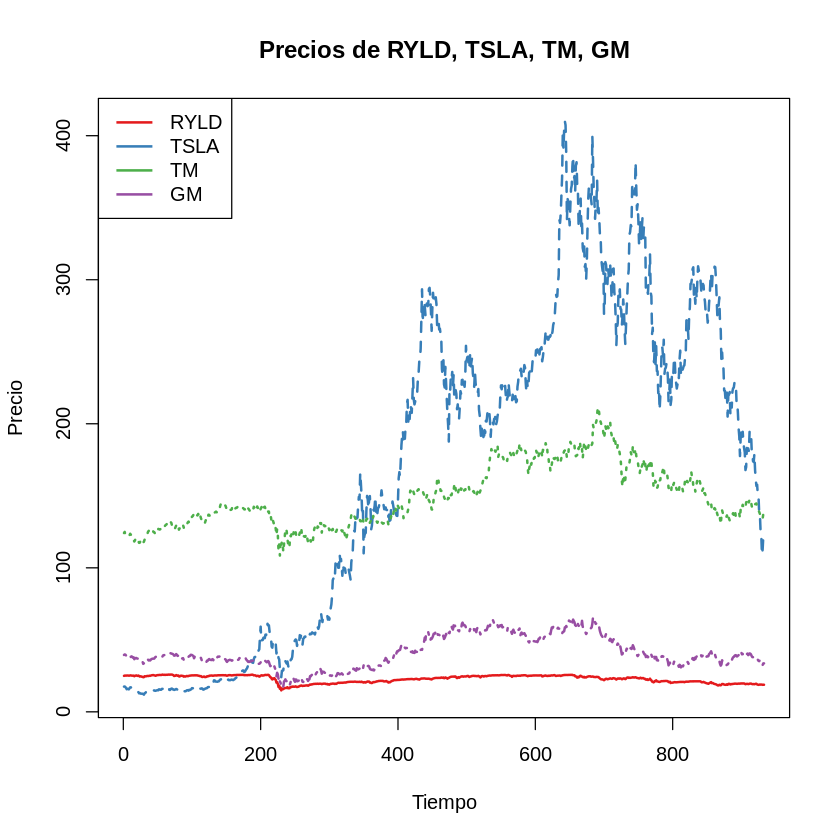

In [153]:
matplot(prices, type = "l", lwd = 2,
        col = RColorBrewer::brewer.pal(4, "Set1"),
        xlab = "Tiempo", ylab = "Precio", main = "Precios de RYLD, TSLA, TM, GM")
legend("topleft", legend = colnames(prices),
       col = RColorBrewer::brewer.pal(4, "Set1"), lty = 1, lwd = 2)

# MODELO VAR

## Preparacion de datos

In [53]:
xpr <- as.xts(prices, dateFormat = "Date")
Pr_index <- fortify.zoo(xpr)
head(Pr_index)
nrow(prices)

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


[1] 933

## Prueba de cointegración

### Nivel K selection

In [56]:
nivelk = VARselect(prices, lag.max = 7, type = "trend")
nivelk$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      3      1      3

Teniendo en cuenta que 3 es el de mayor voto, el nivel autoregressivo será de 3

### Johansen Test

In [57]:
johatest = ca.jo(prices, type = "trace", K=3, ecdet = "trend", spec = "longrun")
summary(johatest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 2.529166e-02 1.376376e-02 6.064437e-03 2.303555e-03 4.157979e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  2.14 10.49 12.25 16.26
r <= 2 |  7.80 22.76 25.32 30.45
r <= 1 | 20.69 39.06 42.44 48.45
r = 0  | 44.51 59.14 62.99 70.05

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              RYLD.l3      TSLA.l3        TM.l3        GM.l3    trend.l3
RYLD.l3   1.000000000  1.000000000  1.000000000  1.000000000  1.00000000
TSLA.l3   0.036404848  0.022687597 -0.012379239 -0.007319586 -0.07313541
TM.l3    -0.191528267  0.138861990 -0.019690693 -0.025447784 -0.08310309
GM.l3    -0.125536528 -0.558087457 -0.021817591  0.082826863 -0.13645739
trend.l3  0.001246161 -0.003468326  0.005833167  0.026362996  0.03823681

Weights W:
(This is the lo

Teniendo en cuenta que el rango test es menor al p10, p5 y p1, nos indica que el  sistema no esta cointegrado por lo cual VAR es el modelo adecuado.

### Prueba Gragner

In [58]:
ryld = ts(prices$RYLD, start = c(2019,04,22), frequency = 365)
tsla = ts(prices$TSLA, start = c(2019,04,22), frequency = 365)
tm = ts(prices$TM, start = c(2019,04,22), frequency = 365)
gm = ts(prices$GM, start = c(2019,04,22), frequency = 365)

In [59]:
dataVAR2 = ts.intersect(ryld, tsla, tm, gm) %>% na.omit()
head(dataVAR2)

,ryld,tsla,tm,gm
2019.008,24.995,17.51667,124.16,39.50
2019.011,25.157,17.59333,124.94,39.83
2019.014,25.189,17.24400,122.88,39.72
2019.016,25.130,16.50867,123.19,39.11
2019.019,25.225,15.67600,123.62,39.68
2019.022,25.250,16.09800,123.81,40.01


### Var summary

In [60]:
m1 <- vars::VAR(y=dataVAR2, lag.max =  7)
summary(m1)


VAR Estimation Results:
Endogenous variables: ryld, tsla, tm, gm 
Deterministic variables: const 
Sample size: 930 
Log Likelihood: -6325.281 
Roots of the characteristic polynomial:
0.9968 0.992 0.9788 0.9788 0.5651 0.4271 0.2805 0.2805 0.2482 0.2482 0.1957 0.1752
Call:
vars::VAR(y = dataVAR2, lag.max = 7)


Estimation results for equation ryld: 
ryld = ryld.l1 + tsla.l1 + tm.l1 + gm.l1 + ryld.l2 + tsla.l2 + tm.l2 + gm.l2 + ryld.l3 + tsla.l3 + tm.l3 + gm.l3 + const 

          Estimate Std. Error t value Pr(>|t|)    
ryld.l1  0.8548636  0.0416674  20.516  < 2e-16 ***
tsla.l1  0.0004426  0.0011530   0.384   0.7012    
tm.l1   -0.0020930  0.0045432  -0.461   0.6451    
gm.l1    0.0159732  0.0102214   1.563   0.1185    
ryld.l2  0.4103395  0.0541339   7.580 8.44e-14 ***
tsla.l2 -0.0024547  0.0015791  -1.554   0.1204    
tm.l2    0.0015377  0.0064631   0.238   0.8120    
gm.l2   -0.0333012  0.0139192  -2.392   0.0169 *  
ryld.l3 -0.2767453  0.0416052  -6.652 4.97e-11 ***
tsla.l3  0.00184

RYLD la explica significativamente su propio rezago 1,2 y 3 al igual que el razgo 2 y 4 de GM.

TSLA la explica significativamente unicamente su propio rezago 1.

TM la explica significativamente su primer rezago al igual que el rezago 1, y 2 de RYLD.

QM la explica significativamente el rezago 2 y 3 de RYLD, el primer rezago de GM, 1,2 y 3 de TSLA.

## Modelo con MTS y revisión de estacionaridad en VAR

In [61]:
m2=VARorder(dataVAR2)

selected order: aic =  3 
selected order: bic =  1 
selected order: hq =  3 
Summary table:  
       p     AIC     BIC      HQ       M(p) p-value
 [1,]  0 19.1094 19.1094 19.1094     0.0000  0.0000
 [2,]  1  2.4542  2.5371  2.4858 15262.6008  0.0000
 [3,]  2  2.4370  2.6029  2.5003    46.8765  0.0001
 [4,]  3  2.3906  2.6395  2.4855    73.1659  0.0000
 [5,]  4  2.4172  2.7491  2.5438     6.8793  0.9755
 [6,]  5  2.4262  2.8411  2.5844    22.7474  0.1207
 [7,]  6  2.4404  2.9383  2.6303    17.9929  0.3243
 [8,]  7  2.4549  3.0357  2.6764    17.6669  0.3438
 [9,]  8  2.4461  3.1099  2.6992    38.1990  0.0014
[10,]  9  2.4541  3.2009  2.7389    23.1495  0.1098
[11,] 10  2.4471  3.2768  2.7635    36.3320  0.0026
[12,] 11  2.4602  3.3729  2.8083    18.5270  0.2940
[13,] 12  2.4657  3.4614  2.8454    25.0479  0.0690
[14,] 13  2.4833  3.5620  2.8947    14.4592  0.5645


El dato de mayor voto es AR 3

In [62]:
#Vemos que el orden regresivo es similar, con l=3. Procedemos con el modelo VAR mediante librería MTS
m2_mts=MTS::VAR(dataVAR2, 3)


Constant term: 
Estimates:  0.214778 -2.459948 2.037685 0.6089067 
Std.Error:  0.1085225 3.398908 0.9537554 0.451119 
AR coefficient matrix 
AR( 1 )-matrix 
        [,1]     [,2]     [,3]    [,4]
[1,]  0.8549 0.000443 -0.00209  0.0160
[2,]  1.1018 0.957764  0.01101 -0.3166
[3,] -1.0563 0.015328  0.99596  0.0842
[4,] -0.0146 0.010599 -0.00927  0.9689
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0417 0.00115 0.00454 0.0102
[2,] 1.3050 0.03611 0.14229 0.3201
[3,] 0.3662 0.01013 0.03993 0.0898
[4,] 0.1732 0.00479 0.01889 0.0425
AR( 2 )-matrix 
      [,1]     [,2]     [,3]     [,4]
[1,] 0.410 -0.00245  0.00154 -0.03330
[2,] 0.933  0.03389 -0.03867  0.37849
[3,] 1.274 -0.02247 -0.00170  0.04697
[4,] 0.477 -0.01757 -0.02636 -0.00197
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0541 0.00158 0.00646 0.0139
[2,] 1.6955 0.04946 0.20242 0.4359
[3,] 0.4758 0.01388 0.05680 0.1223
[4,] 0.2250 0.00656 0.02687 0.0579
AR( 3 )-matrix 
       [,1]     [,2]      [,3]    [,4]
[1,] 

En este analisis no se evidencia valores de 0.0000 entre las variables y sus rezagos 1,2 y 3  al igual que los rezagos 1, 2 y 3 de las otras variables

In [64]:
#Procedemos con el análisis de estacionariedad en la matriz regresiva
str(m2_mts)

List of 13
 $ data     : Time-Series [1:933, 1:4] from 2019 to 2022: 25 25.2 25.2 25.1 25.2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "ryld" "tsla" "tm" "gm"
 $ cnst     : logi TRUE
 $ order    : num 3
 $ coef     : num [1:13, 1:4] 0.214778 0.854864 0.000443 -0.002093 0.015973 ...
 $ aic      : num 2.35
 $ bic      : num 2.6
 $ hq       : num 2.45
 $ residuals: num [1:930, 1:4] -0.0908 0.0887 0.0386 -0.0524 -0.0717 ...
 $ secoef   : num [1:13, 1:4] 0.10852 0.04167 0.00115 0.00454 0.01022 ...
 $ Sigma    : num [1:4, 1:4] 0.066 0.781 0.284 0.156 0.781 ...
 $ Phi      : num [1:4, 1:12] 0.854864 1.101812 -1.056302 -0.014565 0.000443 ...
 $ Ph0      : num [1:4] 0.215 -2.46 2.038 0.609
 $ fixed    : NULL


In [69]:
phi1=m2_mts$Phi[, 1:4]
phi2=m2_mts$Phi[, 5:8]
phi3=m2_mts$Phi[, 9:12]
phi1
phi2
phi3

0.85486362,0.0004425604,-0.002093024,0.01597321
1.10181221,0.9577638796,0.011005200,-0.31664892
-1.05630229,0.0153281887,0.995958852,0.08424573
-0.01456467,0.0105985897,-0.009274484,0.96886302


0.4103395,-0.002454747,0.001537723,-0.033301223
0.9330064,0.033886497,-0.038673019,0.378494124
1.2741619,-0.022466201,-0.001704572,0.046966294
0.4774293,-0.017569255,-0.026362371,-0.001971382


-0.2767453,0.0018411181,0.0002749031,0.02008532
-2.0566788,0.0006516521,0.0598465773,-0.07154152
-0.2215106,0.0082074321,-0.0168065583,-0.10104458
-0.4172674,0.0090985403,0.0241464729,0.02588484


In [70]:
eigen(phi1)
eigen(phi2)
eigen(phi3)

eigen() decomposition
$values
[1] 1.0162642+0.0000000i 0.9509086+0.0449066i 0.9509086-0.0449066i
[4] 0.8593679+0.0000000i

$vectors
               [,1]                     [,2]                     [,3]
[1,]  0.02146064+0i  0.008402649+0.02788798i  0.008402649-0.02788798i
[2,] -0.33026171+0i -0.898346231+0.00000000i -0.898346231+0.00000000i
[3,] -0.93799744+0i  0.132724850+0.34411777i  0.132724850-0.34411777i
[4,]  0.10308949+0i  0.014402040+0.23640085i  0.014402040-0.23640085i
               [,4]
[1,] -0.09348248+0i
[2,]  0.68018423+0i
[3,] -0.71369866+0i
[4,] -0.13872515+0i


eigen() decomposition
$values
[1] 0.37804981+0.0000000i 0.01269824+0.1038882i 0.01269824-0.1038882i
[4] 0.03710373+0.0000000i

$vectors
             [,1]                     [,2]                     [,3]
[1,] 0.2067681+0i  0.001626125-0.01768887i  0.001626125+0.01768887i
[2,] 0.6839619+0i -0.893765450+0.00000000i -0.893765450+0.00000000i
[3,] 0.6757097+0i -0.284078761-0.26029288i -0.284078761+0.26029288i
[4,] 0.1812719+0i  0.016998844-0.22831052i  0.016998844+0.22831052i
                [,4]
[1,]  0.003461216+0i
[2,]  0.887634869+0i
[3,] -0.458048688+0i
[4,] -0.047788686+0i


eigen() decomposition
$values
[1] -0.236784081+0.00000000i  0.002012944+0.06842356i  0.002012944-0.06842356i
[4] -0.034257165+0.00000000i

$vectors
             [,1]                     [,2]                     [,3]
[1,] 0.1120120+0i -0.007256159+0.01806895i -0.007256159-0.01806895i
[2,] 0.9754064+0i -0.892371534+0.00000000i -0.892371534+0.00000000i
[3,] 0.1368365+0i -0.359957825-0.12700086i -0.359957825+0.12700086i
[4,] 0.1315727+0i -0.075534840+0.22779276i -0.075534840-0.22779276i
                [,4]
[1,] -0.008324985+0i
[2,] -0.965795178+0i
[3,]  0.258707472+0i
[4,] -0.015518131+0i


Teniendo los valores $values que son menores a uno, excepto el primer valor de phi1, no vamos a sacrificar información

### Modelo VAR Refinado

In [71]:
m3_mts=refVAR(m2_mts,thres = 1.96)

Constant term: 
Estimates:  0 0 1.94735 0 
Std.Error:  0 0 0.9436016 0 
AR coefficient matrix 
AR( 1 )-matrix 
       [,1]    [,2]  [,3]  [,4]
[1,]  0.891 0.00000 0.000 0.000
[2,]  0.000 0.99941 0.000 0.000
[3,] -1.002 0.00000 0.982 0.146
[4,]  0.000 0.00901 0.000 0.986
standard error 
       [,1]    [,2]    [,3]    [,4]
[1,] 0.0321 0.00000 0.00000 0.00000
[2,] 0.0000 0.00129 0.00000 0.00000
[3,] 0.3007 0.00000 0.00563 0.05302
[4,] 0.0000 0.00438 0.00000 0.00585
AR( 2 )-matrix 
      [,1]    [,2]    [,3]    [,4]
[1,] 0.371  0.0000  0.0000 -0.0224
[2,] 0.000  0.0000  0.0000  0.0000
[3,] 0.975  0.0000  0.0000  0.0000
[4,] 0.352 -0.0178 -0.0093  0.0000
standard error 
       [,1]    [,2]    [,3]    [,4]
[1,] 0.0462 0.00000 0.00000 0.00947
[2,] 0.0000 0.00000 0.00000 0.00000
[3,] 0.3005 0.00000 0.00000 0.00000
[4,] 0.1432 0.00629 0.00323 0.00000
AR( 3 )-matrix 
       [,1]   [,2] [,3]    [,4]
[1,] -0.263 0.0000    0  0.0224
[2,]  0.000 0.0000    0  0.0000
[3,]  0.000 0.0000    0 -0.1115
[4

Se hace refinamiento con un valor de 1,96 evidenciamos nivel de significancia de variables con algunos rezagos con valor 0.000 y se observan 18 grados de libertad.

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      16.1    -2.0     1.00
 [2,]   2.0      32.0    14.0     1.00
 [3,]   3.0      37.3    30.0     0.17
 [4,]   4.0      62.2    46.0     0.06
 [5,]   5.0      77.1    62.0     0.09
 [6,]   6.0      92.6    78.0     0.12
 [7,]   7.0     130.5    94.0     0.01
 [8,]   8.0     156.3   110.0     0.00
 [9,]   9.0     196.5   126.0     0.00
[10,]  10.0     213.0   142.0     0.00
[11,]  11.0     234.2   158.0     0.00
[12,]  12.0     247.0   174.0     0.00
[13,]  13.0     258.1   190.0     0.00
[14,]  14.0     286.5   206.0     0.00
[15,]  15.0     310.1   222.0     0.00
[16,]  16.0     326.8   238.0     0.00
[17,]  17.0     353.3   254.0     0.00
[18,]  18.0     373.5   270.0     0.00
[19,]  19.0     413.3   286.0     0.00
[20,]  20.0     420.7   302.0     0.00
[21,]  21.0     440.1   318.0     0.00
[22,]  22.0     454.7   334.0     0.00
[23,]  23.0     475.5   350.0     0.00
[24,]  24.0     514.7   366.0     0.00


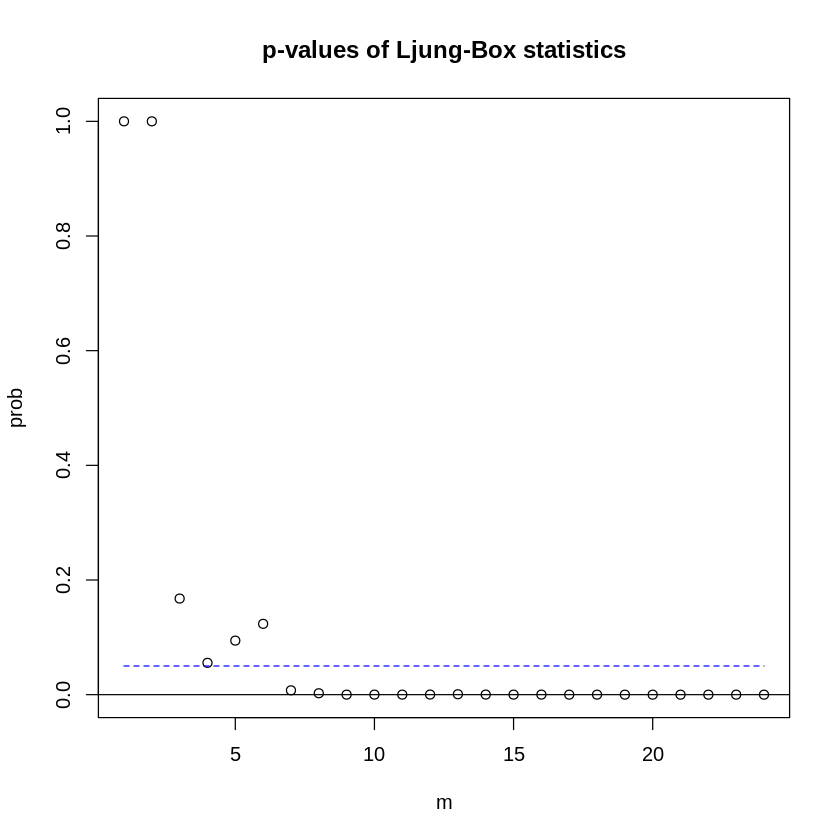

In [72]:
#Modelo check con grados de libertad.
resi3=m3_mts$residuals
mq(resi3, adj=18) #Ajustamos los grados de libertad

Se evidencia que los rezagos de los residuos de AR3 estan arriba del umbral.

[1] "Covariance matrix:"
       ryld   tsla    tm    gm
ryld 0.0668  0.776 0.285 0.157
tsla 0.7762 65.447 5.051 2.783
tm   0.2848  5.051 5.125 1.237
gm   0.1572  2.783 1.237 1.148
CCM at lag:  0 
      [,1]  [,2]  [,3]  [,4]
[1,] 1.000 0.371 0.487 0.568
[2,] 0.371 1.000 0.276 0.321
[3,] 0.487 0.276 1.000 0.510
[4,] 0.568 0.321 0.510 1.000
Simplified matrix: 
CCM at lag:  1 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  2 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  3 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  4 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  5 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  6 
- . . - 
. . . . 
. . . . 
. . . . 
CCM at lag:  7 
+ + . + 
. + . . 
. . . . 
. . . + 
CCM at lag:  8 
. . . - 
. - . . 
. . . - 
. . . - 
CCM at lag:  9 
+ + . . 
. + . + 
+ . . . 
+ . . + 
CCM at lag:  10 
. . . . 
. . . . 
. . - . 
. . - . 
CCM at lag:  11 
. . . . 
. . . + 
. . . . 
. . . . 
CCM at lag:  12 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag: 

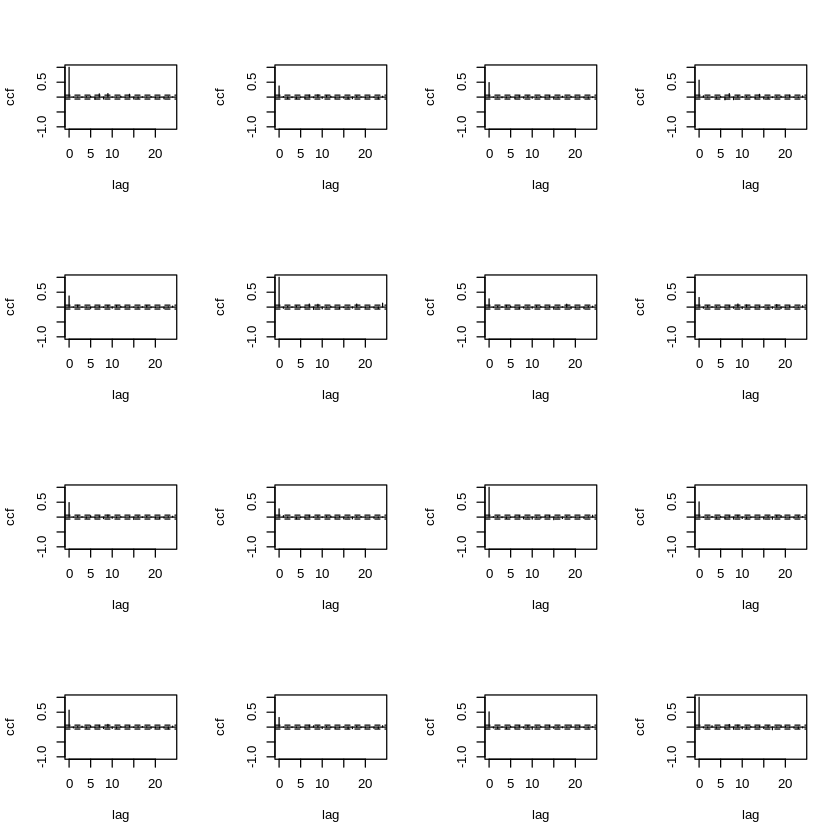

Hit Enter to compute MQ-statistics: 
Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      16.1    -2.0     1.00
 [2,]   2.0      32.0    14.0     1.00
 [3,]   3.0      37.3    30.0     0.17
 [4,]   4.0      62.2    46.0     0.06
 [5,]   5.0      77.1    62.0     0.09
 [6,]   6.0      92.6    78.0     0.12
 [7,]   7.0     130.5    94.0     0.01
 [8,]   8.0     156.3   110.0     0.00
 [9,]   9.0     196.5   126.0     0.00
[10,]  10.0     213.0   142.0     0.00
[11,]  11.0     234.2   158.0     0.00
[12,]  12.0     247.0   174.0     0.00
[13,]  13.0     258.1   190.0     0.00
[14,]  14.0     286.5   206.0     0.00
[15,]  15.0     310.1   222.0     0.00
[16,]  16.0     326.8   238.0     0.00
[17,]  17.0     353.3   254.0     0.00
[18,]  18.0     373.5   270.0     0.00
[19,]  19.0     413.3   286.0     0.00
[20,]  20.0     420.7   302.0     0.00
[21,]  21.0     440.1   318.0     0.00
[22,]  22.0     454.7   334.0     0.00
[23,]  23.0     475.5   350.0     0.00
[24

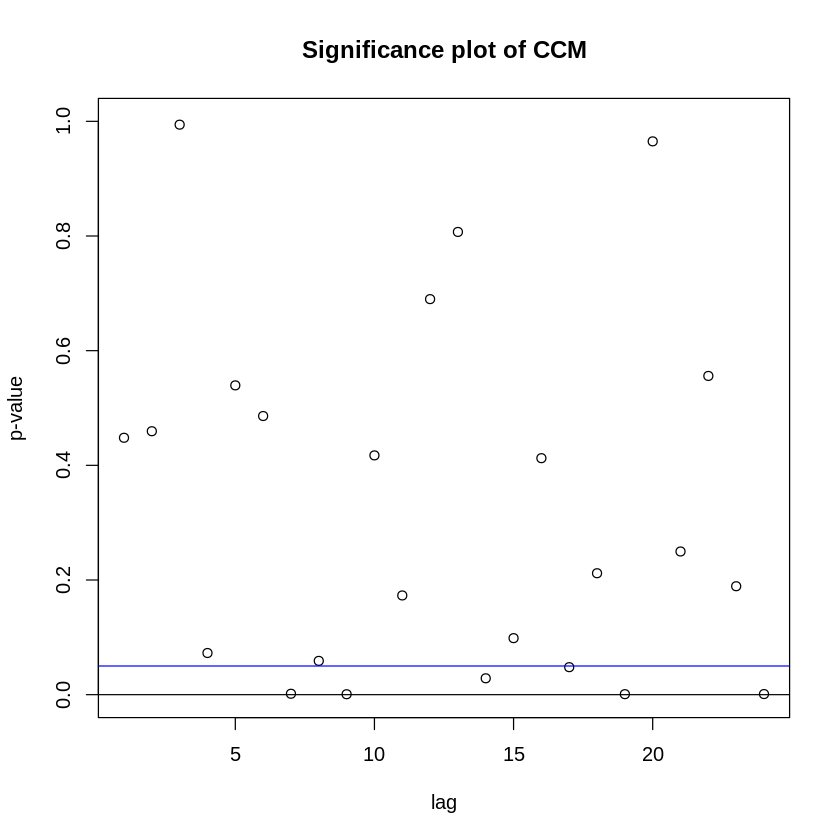

Hit Enter to obtain residual plots: 


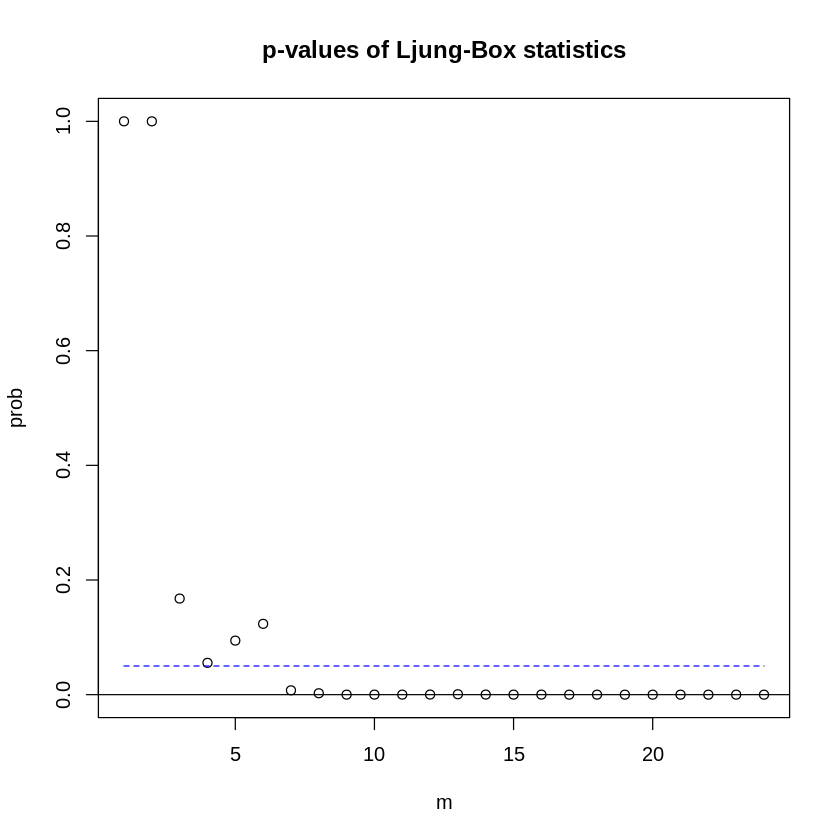

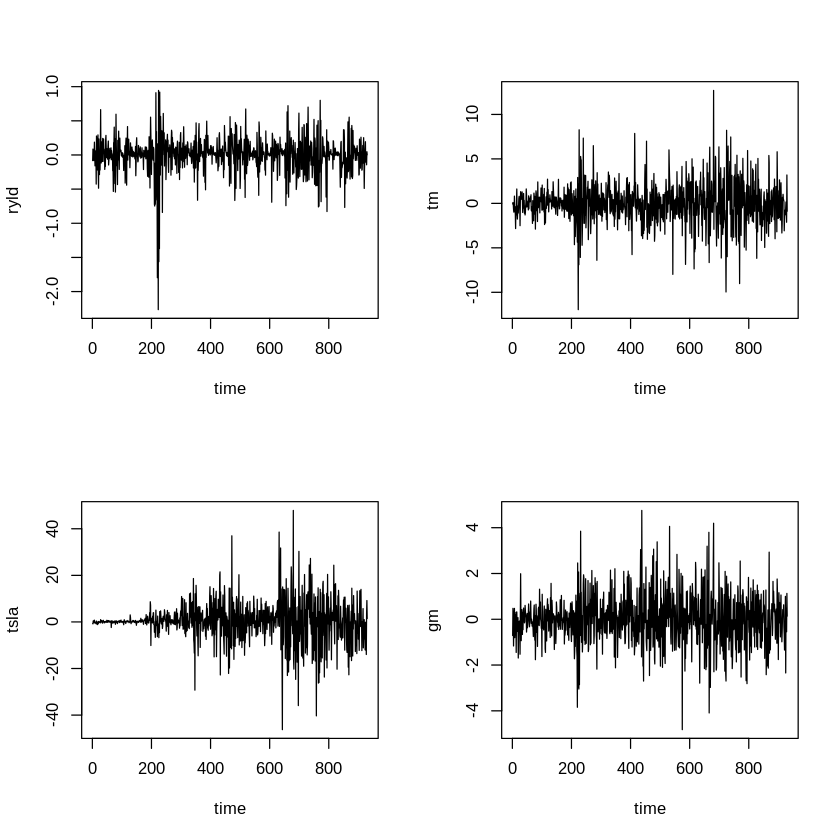

In [73]:
# Y revisamos el efecto instantaneo entre las variables
MTSdiag(m3_mts, adj = 18)

De acuerdo al CCM at lag 0, ningun p-value es menor al 5%, por lo cual ninguna de las variables afecta a las otra de forma instantanea

## Pronostico

orig  933 
Forecasts at origin:  933 
       ryld  tsla    tm    gm
 [1,] 18.80 123.1 136.8 33.40
 [2,] 18.79 123.0 136.9 33.21
 [3,] 18.78 123.0 136.9 33.05
 [4,] 18.78 122.9 136.9 32.88
 [5,] 18.78 122.8 137.0 32.72
 [6,] 18.77 122.7 137.0 32.56
 [7,] 18.77 122.7 137.0 32.41
 [8,] 18.77 122.6 137.0 32.25
 [9,] 18.76 122.5 137.0 32.10
[10,] 18.76 122.5 137.0 31.95
Standard Errors of predictions:  
        [,1]   [,2]  [,3]  [,4]
 [1,] 0.2583  8.088 2.263 1.071
 [2,] 0.3460 11.435 3.145 1.522
 [3,] 0.4503 14.001 3.862 1.868
 [4,] 0.5270 16.163 4.445 2.152
 [5,] 0.6014 18.065 4.951 2.402
 [6,] 0.6652 19.783 5.398 2.624
 [7,] 0.7250 21.362 5.801 2.827
 [8,] 0.7794 22.831 6.169 3.014
 [9,] 0.8306 24.208 6.509 3.188
[10,] 0.8786 25.510 6.824 3.351
Root mean square errors of predictions:  
          [,1]     [,2]     [,3]    [,4]
 [1,]   0.2601    8.145    2.278   1.078
 [2,] 114.9812 4037.902 1091.216 540.008
 [3,] 143.9365 4035.540 1119.432 541.387
 [4,] 136.8351 4033.180 1099.528 534.073

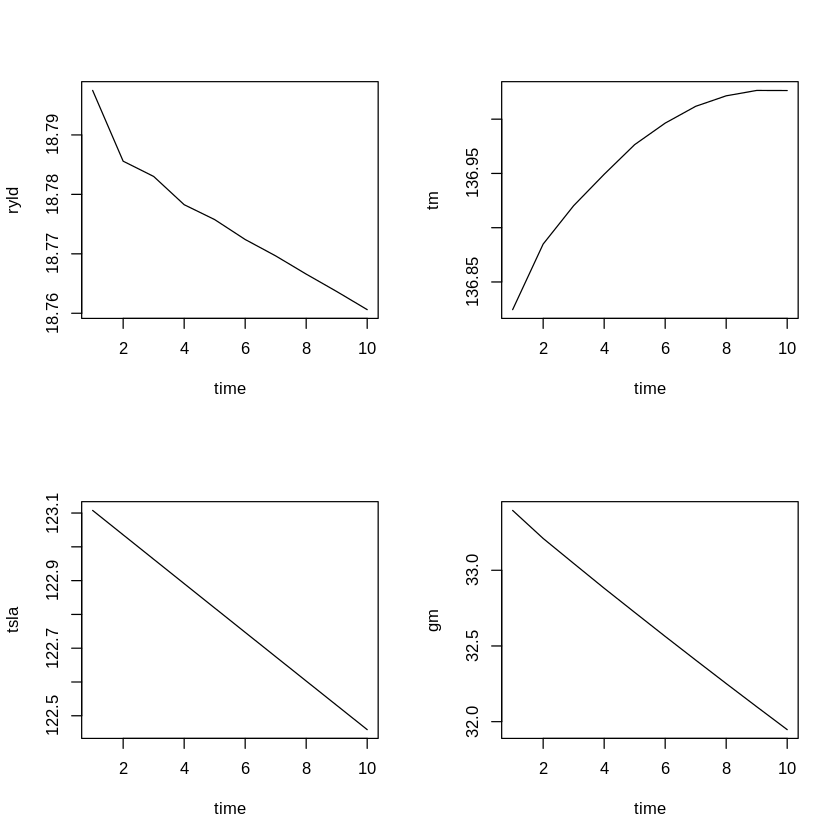

In [74]:
pred2 = VARpred(m3_mts, h=10)
MTSplot(pred2$pr)

## VAR con portafolio diferenciado:

In [75]:
# Comenzamos diferenciando los activo para luego unirlos
ryld.d = diff.xts(s1$RYLD.Close)[-1,]
tsla.d = diff.xts(s2$TSLA.Close)[-1,]
tm.d = diff.xts(s3$TM.Close)[-1,]
gm.d = diff.xts(s4$GM.Close)[-1,]
adf.test(ryld.d)
adf.test(tsla.d)
adf.test(tm.d)
adf.test(gm.d)


	Augmented Dickey-Fuller Test

data:  ryld.d
Dickey-Fuller = -8.0814, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  tsla.d
Dickey-Fuller = -9.2478, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  tm.d
Dickey-Fuller = -10.768, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  gm.d
Dickey-Fuller = -9.895, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Se evidencia que no hay raiz unitaria con el p-value mayor a 0.05 por lo que se rechaza la hipotesis nula de la presencia de estacionariedad.

In [76]:
# Pasamos a formato ts 2019-04-22
ryld.d.ts = ts(ryld.d, start = c(2019,04,22), frequency = 365)
tsla.d.ts = ts(tsla.d, start = c(2019,04,22), frequency = 365)
tm.d.ts = ts(tm.d, start = c(2019,04,22), frequency = 365)
gm.d.ts = ts(gm.d, start = c(2019,04,22), frequency = 365)

In [78]:
# y unimos
dataVAR3 = ts.intersect(ryld.d.ts, tsla.d.ts, tm.d.ts, gm.d.ts) %>% na.omit()
head(dataVAR3)

,ryld.d.ts,tsla.d.ts,tm.d.ts,gm.d.ts
2019.008,0.16199875,0.07666588,0.7799988,0.3300018
2019.011,0.03199959,-0.34933281,-2.0600052,-0.1100006
2019.014,-0.05900002,-0.73533249,0.3100052,-0.6100006
2019.016,0.09500122,-0.83266735,0.4300003,0.5699997
2019.019,0.02499962,0.42199993,0.1899948,0.3299980
2019.022,-0.03899956,-0.18533230,-0.2099991,-1.0599976


### Nivel k selection

In [79]:
nivelk3 = VARselect(dataVAR3, lag.max = 7, type = 'const')
nivelk3$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      1      2

Teniendo en cuenta que 2 es el de mayor voto, el nivel autoregressivo será de 2

### Johansen Test

In [80]:
johatest = ca.jo(dataVAR3, type = 'trace', K=2, ecdet = "none", spec = "longrun")
summary(johatest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.3540688 0.3349532 0.3198386 0.2641731

Values of teststatistic and critical values of test:

            test 10pct  5pct  1pct
r <= 3 |  285.29  6.50  8.18 11.65
r <= 2 |  643.73 15.66 17.95 23.52
r <= 1 | 1023.08 28.71 31.52 37.22
r = 0  | 1429.55 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             ryld.d.ts.l2 tsla.d.ts.l2 tm.d.ts.l2   gm.d.ts.l2
ryld.d.ts.l2   1.00000000    1.0000000  1.0000000  1.000000000
tsla.d.ts.l2  -0.01544663   -0.4389176 -0.0856628 -0.003153633
tm.d.ts.l2     0.07562530    0.4685199 -1.3692300 -0.025717102
gm.d.ts.l2    -0.67365925    1.0485825  0.8203948 -0.042121219

Weights W:
(This is the loading matrix)

            ryld.d.ts.l2 tsla.d.ts.l2 tm.d.ts.l2 gm.d.ts.l2
ryld.d.ts.d    0.1042980  0.002304689 0.02652055  -0.997533
tsla.d.ts.d    5.283

Teniendo en cuenta que se diferenciaron las variables, y que los valores de los rangos en test son mayores a pct10, pct5, y 1pc, ya estan equilibradas al largo plazo

### VAR

In [81]:
var_est3 <- vars::VAR(y=dataVAR3, p=2)
summary(var_est3)


VAR Estimation Results:
Endogenous variables: ryld.d.ts, tsla.d.ts, tm.d.ts, gm.d.ts 
Deterministic variables: const 
Sample size: 930 
Log Likelihood: -6346.802 
Roots of the characteristic polynomial:
0.5629 0.412 0.2887 0.2887 0.2812 0.2812 0.1802 0.1441
Call:
vars::VAR(y = dataVAR3, p = 2)


Estimation results for equation ryld.d.ts: 
ryld.d.ts = ryld.d.ts.l1 + tsla.d.ts.l1 + tm.d.ts.l1 + gm.d.ts.l1 + ryld.d.ts.l2 + tsla.d.ts.l2 + tm.d.ts.l2 + gm.d.ts.l2 + const 

               Estimate Std. Error t value Pr(>|t|)    
ryld.d.ts.l1 -1.387e-01  4.146e-02  -3.345 0.000855 ***
tsla.d.ts.l1  3.553e-04  1.149e-03   0.309 0.757293    
tm.d.ts.l1   -1.614e-03  4.517e-03  -0.357 0.721017    
gm.d.ts.l1    1.487e-02  1.012e-02   1.470 0.141930    
ryld.d.ts.l2  2.743e-01  4.161e-02   6.593 7.27e-11 ***
tsla.d.ts.l2 -2.104e-03  1.150e-03  -1.830 0.067595 .  
tm.d.ts.l2   -7.818e-05  4.512e-03  -0.017 0.986179    
gm.d.ts.l2   -1.894e-02  1.009e-02  -1.876 0.060927 .  
const        -5.814e-0

RYDL diferenciado lo explica significativamente su rezago 1 y 2.

TSLA diferenciado no lo explica significativamente ninguna variable ni rezago.

TM diferencia lo explica significativamente unicamente el primer rezago de RYLD.

GM diferenciado lo explica significativamente el primer rezago de TSLA y primer rezago de RYLD

In [82]:
dataVAR3_f = predict(var_est3, n.ahead = 10)

### Recover level forecast

In [86]:
# Como diferenciamos, recuperamos el nivel
nhor=10 #pasos en el pronóstico.
nr_lev <- nrow(prices)
mr_lev= as.matrix(prices)
str(mr_lev)
m.varf_lev_ft <- rbind(mr_lev, matrix(NA, nhor,4 ))
m.ft_df <- do.call(cbind,lapply(dataVAR3_f$fcst,
                                function(x) x[,"fcst"]))

 num [1:933, 1:4] 25 25.2 25.2 25.1 25.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:933] "2019-04-22" "2019-04-23" "2019-04-24" "2019-04-25" ...
  ..$ : chr [1:4] "RYLD" "TSLA" "TM" "GM"


### Growth to level

In [87]:
for(h in (nr_lev+1):(nr_lev+nhor)) {
  hf <- h - nr_lev
  m.varf_lev_ft[h,] <- m.varf_lev_ft[h-1,] + m.ft_df[hf,]
}

### Draw Graph

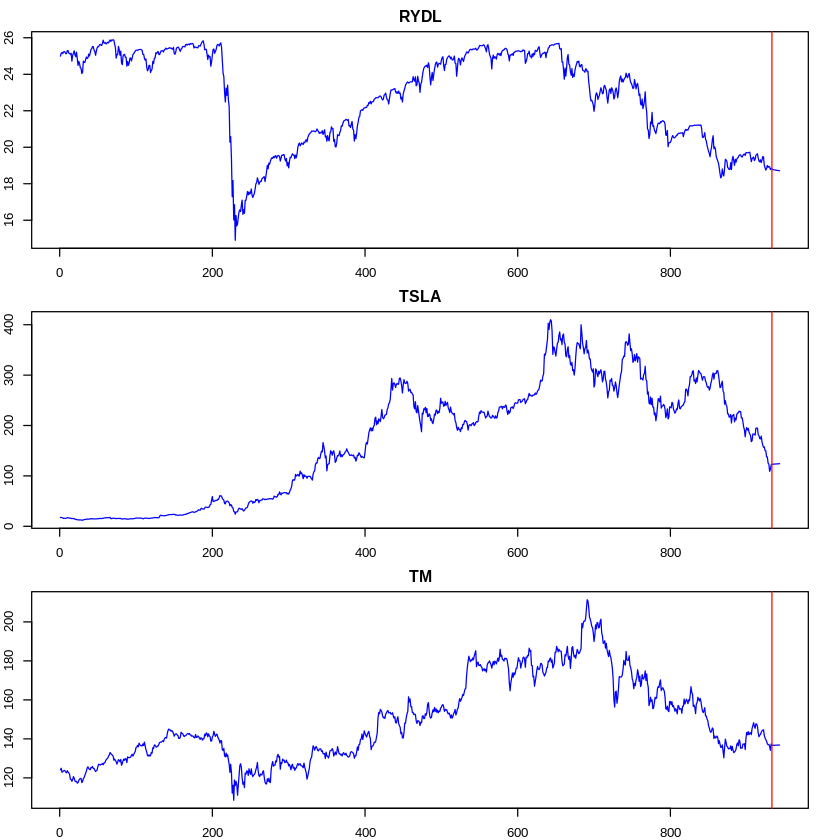

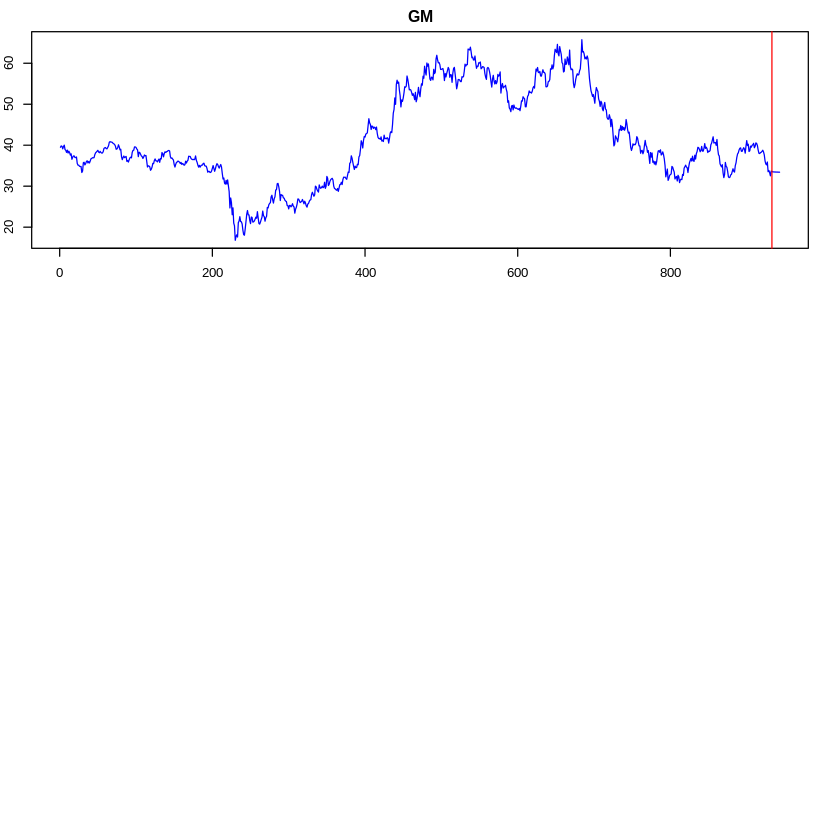

In [88]:
str.main=c("RYDL", "TSLA", "TM", "GM")
par(mfrow=c(3,1), mar=c(2,2,2,2))

for(i in 1:4) {
  df <- m.varf_lev_ft[,i]
  matplot(df, type=c("l"), col = c("blue"),
          main = str.main[i])
  abline(v=nr_lev, col="red")
}

## Funcion Impulso respuesta

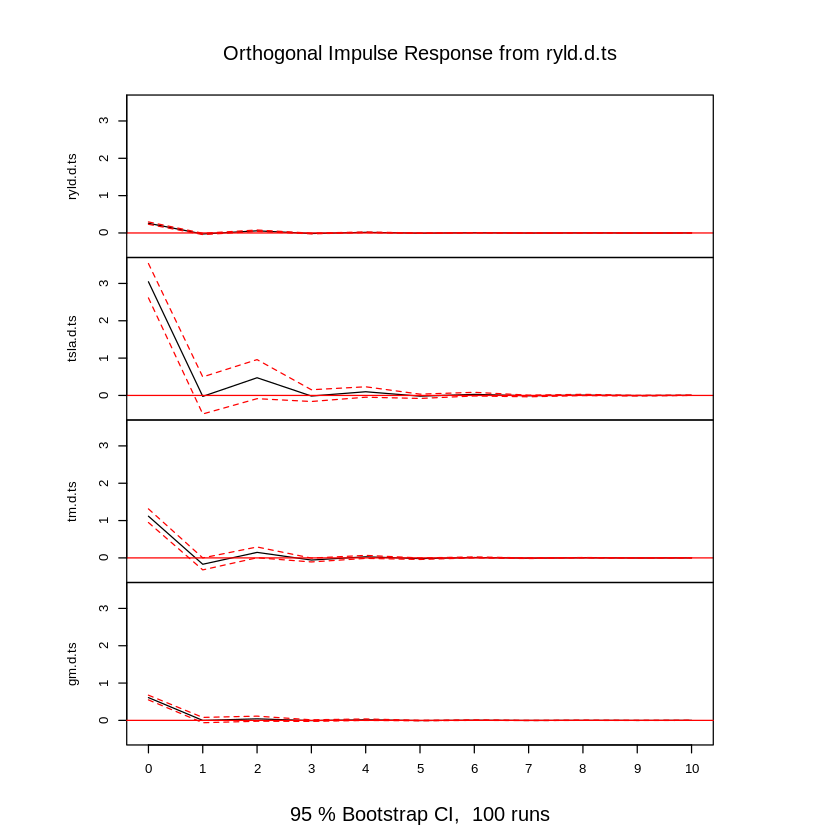

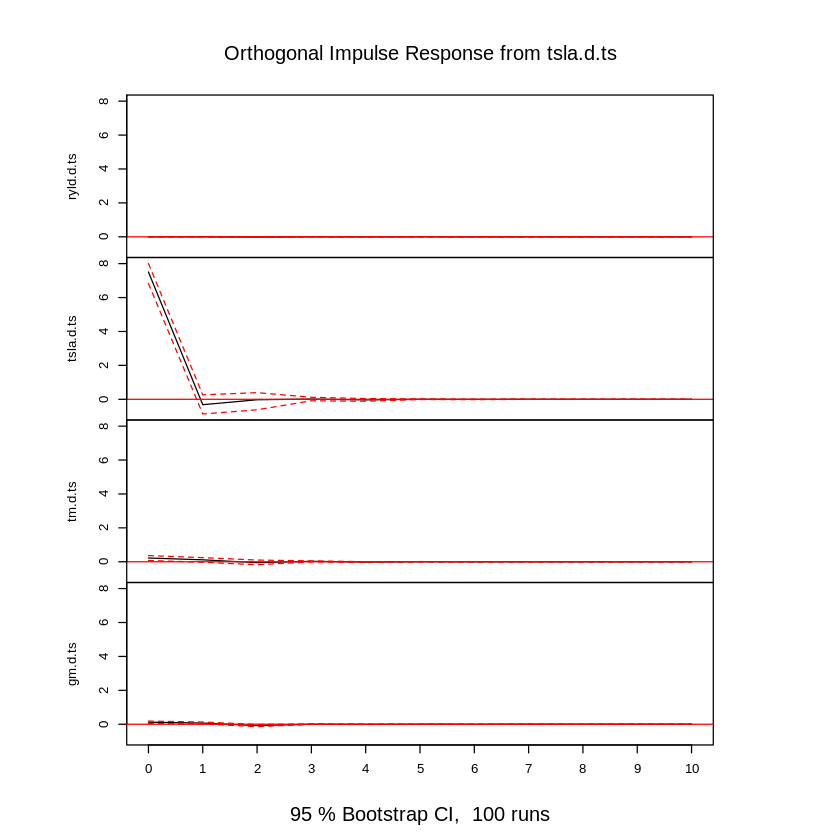

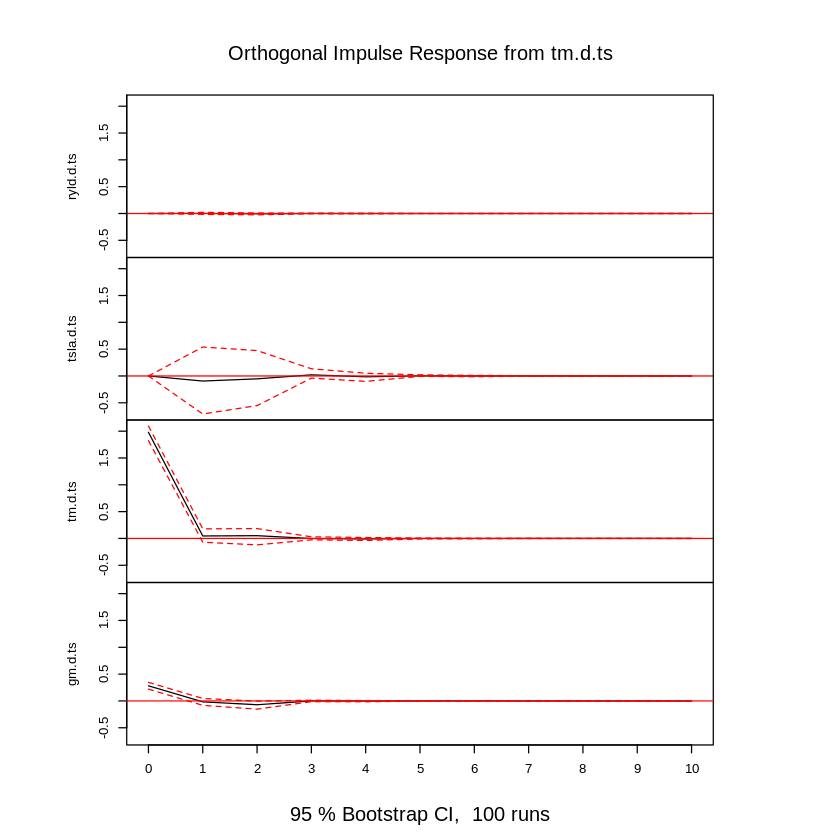

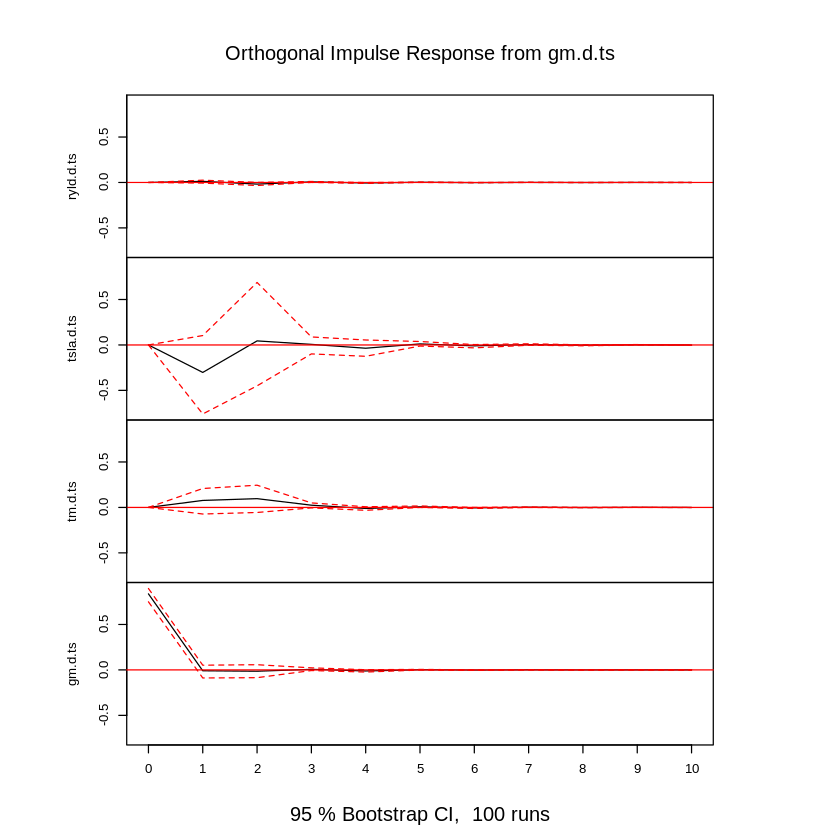

In [89]:
m1irf = irf(var_est3, n.ahead = 10, boot = TRUE)
plot(m1irf)

###### Ante un shock positivo en RYLD:

RYLD: Responde con una caída inicial y regresa a cero rápidamente (el efecto es transitorio, se disipa en 1 periodo).
TSLA: Presenta una caída fuerte en el primer periodo, y después rebota y se normaliza en 2-3 periodos.
TM: Cae al siguiente periodo, rebota y vuelve a la normalidad en 1-2 periodos.
GM: Cae al primer periodo y recupera el nivel inicial también en 1 periodo.

Conclusión: Un shock en RYLD afecta negativamente a TSLA, TM y GM, pero el efecto se desvanece rápidamente (máximo 2 periodos).

######  Ante un shock positivo en TSLA:

RYLD: No hay un efecto claro; el intervalo incluye cero en todos los periodos.
TSLA: Shock positivo muy fuerte en t=0, pero el efecto desaparece casi por completo en el siguiente periodo (el efecto es autorregresivo y muy transitorio).
TM: Ligera reacción positiva inicial, pero no significativa (el intervalo cruza cero).
GM: Efecto mínimo, no significativo.

Conclusión: Un shock en TSLA afecta principalmente a sí misma, con un gran salto inicial que desaparece rápido; las demás variables apenas se ven afectadas.

###### Ante un shock positivo en TM:

RYLD: Sin reacción significativa (el intervalo siempre incluye cero).
TSLA: Respuesta negativa en el primer periodo, vuelve a cero en 2 periodos (aunque los intervalos son amplios, puede haber una pequeña influencia negativa transitoria).
TM: Efecto positivo inicial en sí misma, se disipa en 2 periodos.
GM: Efecto pequeño y transitorio, se disipa en 1 periodo.

Conclusión: Un shock en TM afecta principalmente a sí misma, con un efecto que se desvanece rápido, y tiene un efecto negativo muy leve y transitorio sobre TSLA.

###### Ante un shock positivo en GM:

RYLD: Sin reacción significativa.
TSLA: Muestra una pequeña reacción negativa en los primeros periodos, se normaliza rápidamente.
TM: Pequeña reacción positiva en el primer periodo, desaparece pronto.
GM: Fuerte impacto inicial en sí misma, desaparece en 1-2 periodos.

Conclusión: Un shock en GM afecta solo de forma transitoria y leve a TSLA y TM; su principal efecto es sobre sí misma.

## Comparacion de resultados

### Particion de muestas

In [108]:
n <- nrow(dataVAR3)
test_size <- ceiling(0.05 * n)  # 5% para test
train_size <- n - test_size     # 95% para train

train_VAR <- dataVAR3[1:train_size, ]
test_VAR <- dataVAR3[(train_size + 1):n, ]

### Ajustar el modelo VAR

In [110]:
VAR_model <- VAR(train_VAR, p = 2)

### Prediccion sobre prueba

In [111]:
dataVAR3_f = predict(VAR_model, n.ahead = test_size)

### Recuperación de nivel

In [102]:
# Como diferenciamos, recuperamos el nivel
nhor= test_size
nr_lev <- nrow(prices)
mr_lev= as.matrix(prices)
str(mr_lev)
m.varf_lev_ft <- rbind(mr_lev, matrix(NA, nhor,4 ))
m.ft_df <- do.call(cparbind,lapply(dataVAR3_f$fcst,
                                function(x) x[,"fcst"]))

for(h in (nr_lev+1):(nr_lev+nhor)) {
  hf <- h - nr_lev
  m.varf_lev_ft[h,] <- m.varf_lev_ft[h-1,] + m.ft_df[hf,]
}

 num [1:933, 1:4] 25 25.2 25.2 25.1 25.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:933] "2019-04-22" "2019-04-23" "2019-04-24" "2019-04-25" ...
  ..$ : chr [1:4] "RYLD" "TSLA" "TM" "GM"


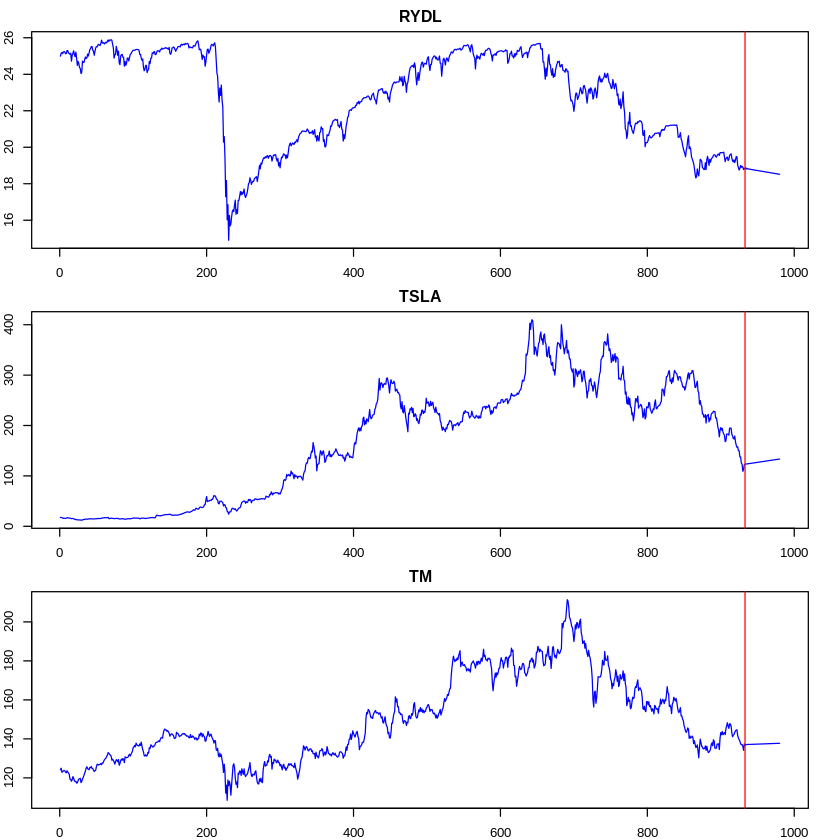

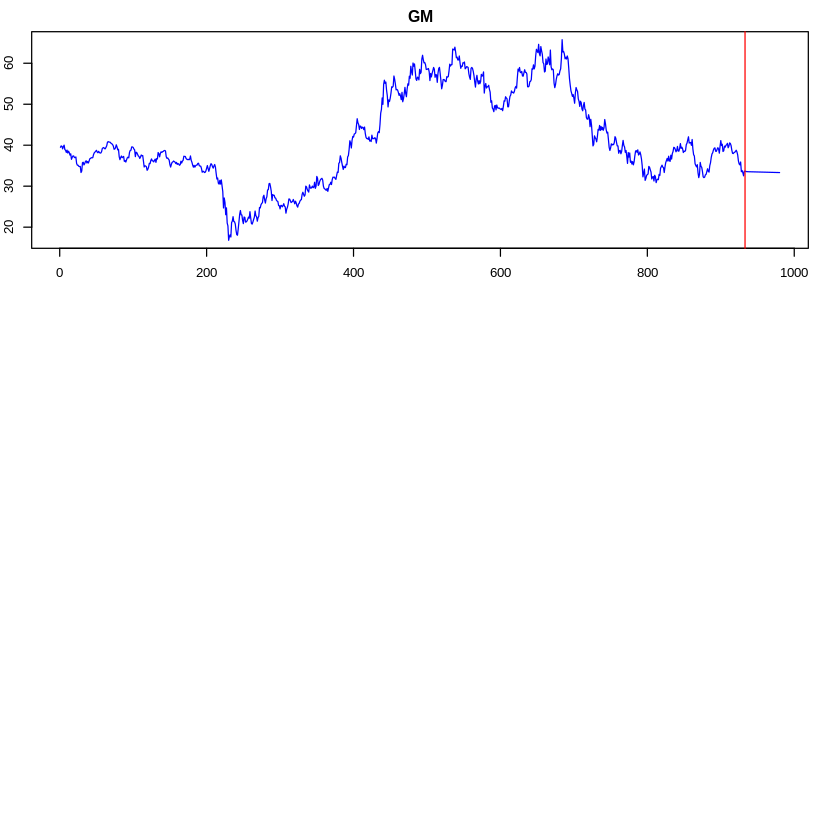

In [103]:
str.main=c("RYDL", "TSLA", "TM", "GM")
par(mfrow=c(3,1), mar=c(2,2,2,2))

for(i in 1:4) {
  df <- m.varf_lev_ft[,i]
  matplot(df, type=c("l"), col = c("blue"),
          main = str.main[i])
  abline(v=nr_lev, col="red")
}

In [135]:
y_true <- as.matrix(prices[(train_size + 1):(train_size + test_size), ])

# Valores predichos de test (los nhor valores añadidos después del entrenamiento)
y_pred <- m.varf_lev_ft[(nr_lev + 1):(nr_lev + nhor), ]

In [136]:
length(y_pred)

[1] 188

#### Calculo de metricas

In [115]:
mape <- function(y, yhat) mean(abs((y - yhat)/y)) * 100
rmse <- function(y, yhat) sqrt(mean((y - yhat)^2))
mae  <- function(y, yhat) mean(abs(y - yhat))

str.main <- c("RYDL", "TSLA", "TM", "GM")

for(i in 1:4){
  cat("Serie:", str.main[i], "\n")
  cat("MAPE:", mape(y_true[, i], y_pred[, i]), "\n")
  cat("RMSE:", rmse(y_true[, i], y_pred[, i]), "\n")
  cat("MAE: ", mae(y_true[, i], y_pred[, i]), "\n\n")
}

Serie: RYDL 
MAPE: 3.465826 
RMSE: 0.7118358 
MAE:  0.673756 

Serie: TSLA 
MAPE: 28.37425 
RMSE: 61.32481 
MAE:  54.31864 

Serie: TM 
MAPE: 2.883149 
RMSE: 5.190178 
MAE:  4.135529 

Serie: GM 
MAPE: 12.06131 
RMSE: 5.105441 
MAE:  4.697694 



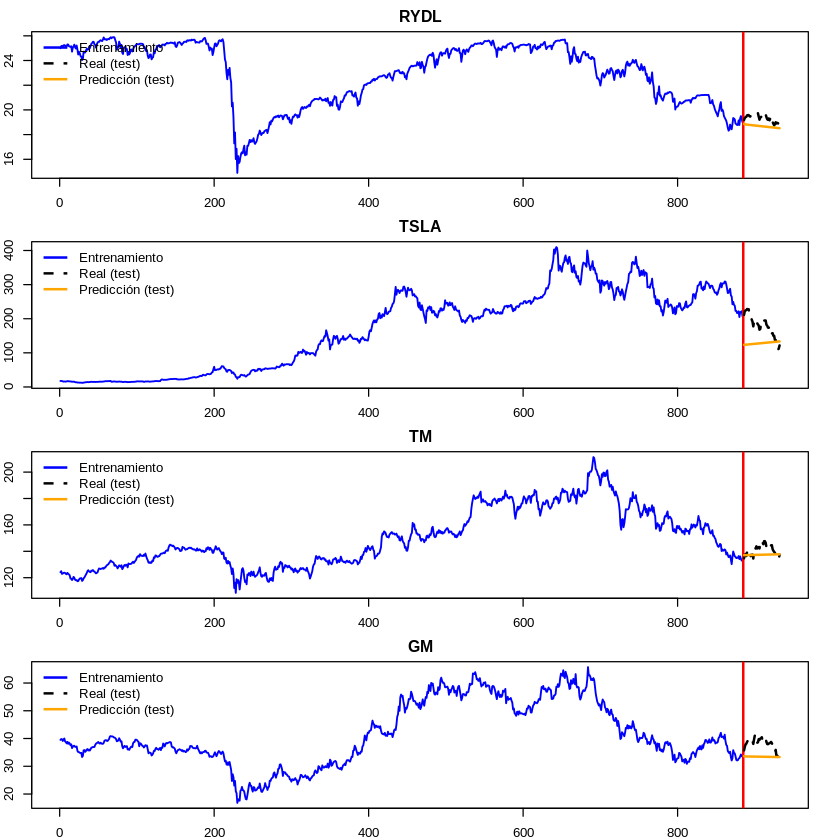

In [117]:
par(mfrow = c(4, 1), mar = c(2, 2, 2, 2))

for (i in 1:4) {
  # Serie real entrenamiento
  plot(1:train_size, prices[1:train_size, i], type = "l", col = "blue",
       main = str.main[i], ylab = "Precio", xlab = "Tiempo", lwd=1.5, xlim = c(1, train_size + test_size))

  # Línea roja: separación entrenamiento/test
  abline(v = train_size, col = "red", lwd = 2)

  # Real test: los valores inmediatamente después del entrenamiento
  lines((train_size + 1):(train_size + test_size), prices[(train_size + 1):(train_size + test_size), i],
        col = "black", lty = 2, lwd = 2)

  # Predicción test
  lines((train_size + 1):(train_size + test_size), y_pred[, i],
        col = "orange", lwd = 2)

  legend("topleft", legend = c("Entrenamiento", "Real (test)", "Predicción (test)"),
         col = c("blue", "black", "orange"), lty = c(1, 2, 1), lwd = 2, bty = "n")
}

# Modelo ARDL

En el caso de ARDL explica el comportamiento del índice en función de los activos.

## Prueba de estacionariedad

In [118]:
# Comprobamos que las series no son estacionarias
adf.test(s1)
adf.test(s2)
adf.test(s3)
adf.test(s4)


	Augmented Dickey-Fuller Test

data:  s1
Dickey-Fuller = -1.9681, Lag order = 9, p-value = 0.5918
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s2
Dickey-Fuller = -0.82177, Lag order = 9, p-value = 0.9597
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s3
Dickey-Fuller = -1.3187, Lag order = 9, p-value = 0.8667
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s4
Dickey-Fuller = -1.3763, Lag order = 9, p-value = 0.8423
alternative hypothesis: stationary


Se tienen raiz unitarias, no se puede rechazar de la hipotesis nula por lo tanto son series no estacionarias.

In [25]:
# Diferenciacion de la serie quitando los Na
adf.test(diff(s1)%>%na.omit())
adf.test(diff(s2)%>%na.omit())
adf.test(diff(s3)%>%na.omit())
adf.test(diff(s4)%>%na.omit())


	Augmented Dickey-Fuller Test

data:  diff(s1) %>% na.omit()
Dickey-Fuller = -8.0814, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s2) %>% na.omit()
Dickey-Fuller = -9.2478, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s3) %>% na.omit()
Dickey-Fuller = -10.768, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s4) %>% na.omit()
Dickey-Fuller = -9.895, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Se rechaza la hipotesis nula de presencia de raiz unitaria lo que quiere decir que todas las series son I1 por lo cual podemos aplicar el ARDL

## Aplicación de modelo

In [34]:
pr_df = as.data.frame(prices)
# Se realiza un busqueda tipo grid search
# Selección automatica
models <- auto_ardl(RYLD ~ TSLA + TM + GM, data = pr_df, max_order = 6)

In [35]:
# Revisemos el top 20 de los mejores modelos segun su criterio de informacion de akaike
models$top_orders

RYLD,TSLA,TM,GM,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,3,-349.3062
3,1,2,3,-347.8537
3,2,1,3,-347.4680
3,1,1,4,-346.6871
4,1,1,3,-345.9897
3,2,2,3,-345.9710
4,1,1,4,-344.7453
4,1,2,3,-344.5477
3,2,3,3,-344.1957


Se selecciona el AIC menor siendo el ultimo registrado con -337,95

In [40]:
# Procedemos a construir el modelo de regresión con la mejor combinación

mod1 <-ardl(RYLD ~ TSLA + TM + GM, data = pr_df, order = c(5,4,1,5))
summary(mod1)


Time series regression with "ts" data:
Start = 6, End = 933

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67658 -0.09593  0.00915  0.11146  0.74117 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.342e-01  8.456e-02   1.587  0.11290    
L(RYLD, 1)   8.714e-01  3.234e-02  26.949  < 2e-16 ***
L(RYLD, 2)   3.298e-01  4.217e-02   7.821 1.44e-14 ***
L(RYLD, 3)  -2.017e-01  4.299e-02  -4.691 3.14e-06 ***
L(RYLD, 4)   3.444e-02  4.103e-02   0.839  0.40143    
L(RYLD, 5)  -5.008e-02  3.088e-02  -1.622  0.10519    
TSLA         5.976e-03  8.684e-04   6.881 1.10e-11 ***
L(TSLA, 1)  -6.657e-03  1.201e-03  -5.541 3.93e-08 ***
L(TSLA, 2)  -3.847e-04  1.228e-03  -0.313  0.75407    
L(TSLA, 3)   7.163e-04  1.226e-03   0.584  0.55920    
L(TSLA, 4)  -5.250e-07  8.943e-04  -0.001  0.99953    
TM           2.731e-02  3.406e-03   8.017 3.31e-15 ***
L(TM, 1)    -2.62

El modelo es significativo por el f-value de la regresión es diferente de 0 y tenemos rezagos significativos

In [41]:
# Para la interpretación, podemos imprimir los rezagos correspondientes de cada variable
# que explican la respuesta

mod1$full_formula

RYLD ~ L(RYLD, 1) + L(RYLD, 2) + L(RYLD, 3) + L(RYLD, 4) + L(RYLD, 
    5) + TSLA + L(TSLA, 1) + L(TSLA, 2) + L(TSLA, 3) + L(TSLA, 
    4) + TM + L(TM, 1) + GM + L(GM, 1) + L(GM, 2) + L(GM, 3) + 
    L(GM, 4) + L(GM, 5)

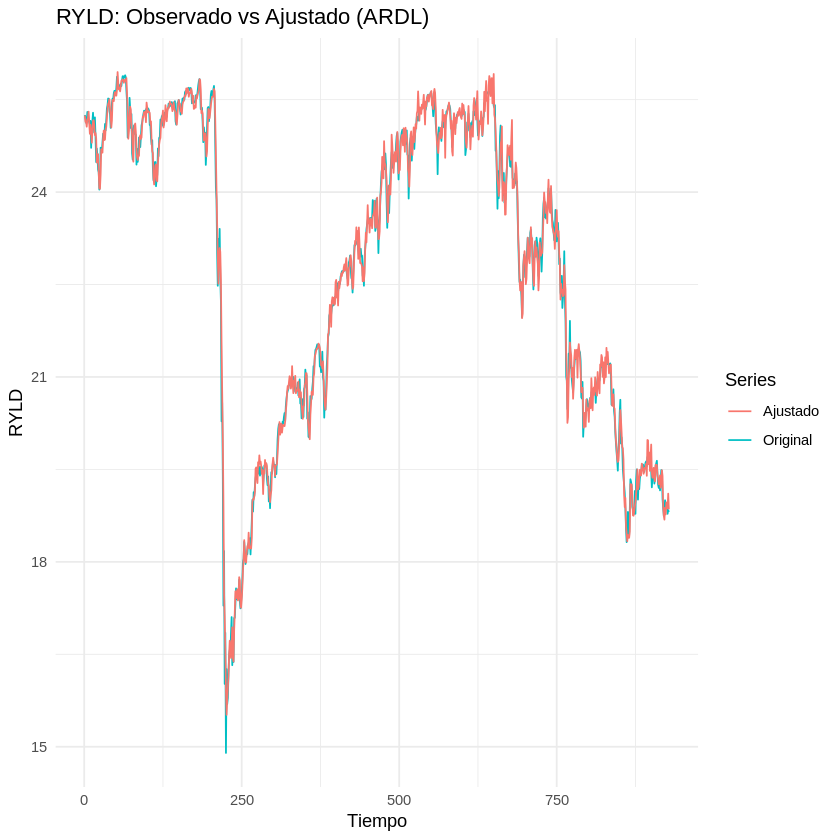

In [44]:
# Visualizacion

fitted_vals <- mod1$fitted.values
pr_df_adj <- tail(pr_df, length(fitted_vals))  # igualamos las dimensiones, pues por los rezagos, no quedaban dimensiones iguales.

pr_df_adj$fitted <- fitted_vals

ggplot(pr_df_adj, aes(x = 1:nrow(pr_df_adj))) +
  geom_line(aes(y = RYLD, color = "Original")) +
  geom_line(aes(y = fitted, color = "Ajustado")) +
  labs(title = "RYLD: Observado vs Ajustado (ARDL)",
       x = "Tiempo",
       y = "RYLD",
       color = "Series") +
  theme_minimal()


## Predicción

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
934       18.84312 18.53185 19.15440 18.36707 19.31918
935       18.83484 18.37304 19.29663 18.12858 19.54109
936       18.82821 18.23877 19.41764 17.92675 19.72967
937       18.82290 18.11809 19.52772 17.74498 19.90083
938       18.81866 18.00698 19.63034 17.57731 20.06001
939       18.81527 17.90345 19.72708 17.42076 20.20977
940       18.81255 17.80623 19.81887 17.27352 20.35159
941       18.81038 17.71446 19.90630 17.13431 20.48644
942       18.80864 17.62747 19.98982 17.00219 20.61509
943       18.80725 17.54472 20.06978 16.87637 20.73813

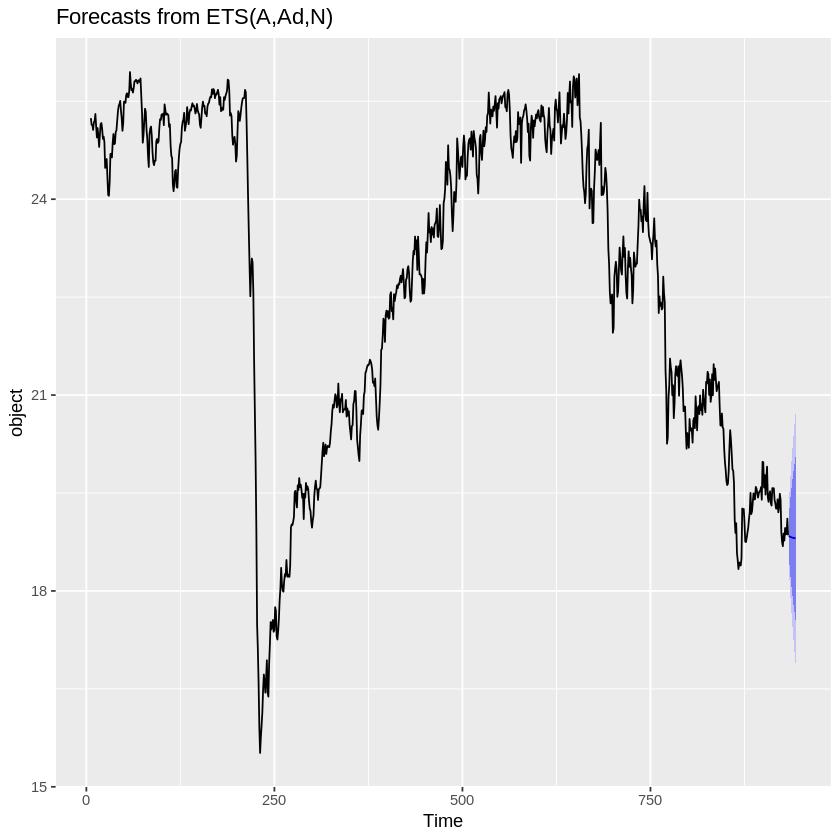

In [46]:
# Predicción del primer modelo sin tendencia
# Es bueno para explicar toda la relación a corto y largo plazo

stats::predict(mod1$fitted.values, 10)

autoplot(predict(mod1$fitted.values, h=10))

## Bound Test

Para la verificación de las relaciones a largo término

In [49]:
# Realizamos la prueba de hipotesis: Hipotesis nula : no cointegracion
bounds_f_test(mod1, case = 2) # Relaciones a largo iempo


	Bounds F-test (Wald) for no cointegration

data:  d(RYLD) ~ L(RYLD, 1) + L(TSLA, 1) + L(TM, 1) + L(GM, 1) + d(L(RYLD,     1)) + d(L(RYLD, 2)) + d(L(RYLD, 3)) + d(L(RYLD, 4)) + d(TSLA) +     d(L(TSLA, 1)) + d(L(TSLA, 2)) + d(L(TSLA, 3)) + d(TM) + d(GM) +     d(L(GM, 1)) + d(L(GM, 2)) + d(L(GM, 3)) + d(L(GM, 4))
F = 2.4036, p-value = 0.2803
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


El p-value demuestra un no rechazo de la hipotesis nula por lo cual no hay evidencia estadisticamente significativa de cointegracion entre las variables bajo el modelo especificado (case = 2)

## Multiplicadores de largo y corto termino

In [50]:
# Multiplicadores a corto pplazo
multipliers(mod1, type = 'sr')

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),0.13417770,0.0845567344,1.586836,1.128975e-01
2,TSLA,0.00597582,0.0008684272,6.881198,1.104608e-11
3,TM,0.02730818,0.0034061718,8.017263,3.311654e-15
4,GM,0.09299507,0.0073210978,12.702339,3.790361e-34


De acuerdo a los p-values significativos, todos los activos tienen un efecto en el corto plazo al indice de respuesta

In [51]:
# Multiplicadores a largo plazo
multipliers(mod1)

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),8.33528156,4.220814885,1.974804,0.0485926689
2,TSLA,-0.02174801,0.006117779,-3.554886,0.0003976331
3,TM,0.06893377,0.040187952,1.715285,0.0866338666
4,GM,0.18131340,0.059591408,3.042610,0.0024127712


El activo TM es la serie que no esta participando en una explicacion a largo plazo al indice.

El activo GM y TSLA si participan en la explicación a largo plazo del indice, en donde un incremento de estos activos genera un cambio de 0.18131340 y -0.02174801 en RYLD respectivamente.

Por eso da que no son cointegrados en el analisis anterior.

## Comparación de resultados

In [ ]:
mod1_train <- ardl(RYLD ~ TSLA + TM + GM, data = train_df, order = c(5,4,1,5))

### Particion de muestras

In [119]:
n <- nrow(pr_df)
test_size <- ceiling(0.05 * n)
train_size <- n - test_size

# Train y Test
train_df <- pr_df[1:train_size, ]
test_df  <- pr_df[(train_size + 1):n, ]

### Entrenamiento de modelo

In [125]:
# Usa el mismo orden óptimo encontrado antes (por ejemplo: c(5,4,1,5))
mod1_train <- ardl(RYLD ~ TSLA + TM + GM, data = train_df, order = c(5,4,1,5))

y_pred <- as.numeric(pred_test)

#### Prediccion sobre test

In [139]:
pred_test <- predict(mod1_train, h = test_size)

y_true <- test_df$RYLD

In [147]:
y_pred <- tail(as.numeric(pred_test), test_size)
length(y_pred)

[1] 47

#### Metricas

In [148]:
mape <- function(y, yhat) mean(abs((y - yhat)/y)) * 100
rmse <- function(y, yhat) sqrt(mean((y - yhat)^2))
mae  <- function(y, yhat) mean(abs(y - yhat))

cat("MAPE:", mape(y_true, y_pred), "\n")
cat("RMSE:", rmse(y_true, y_pred), "\n")
cat("MAE: ", mae(y_true, y_pred), "\n")

MAPE: 2.984764 
RMSE: 0.731654 
MAE:  0.579237 


#### Graficacion

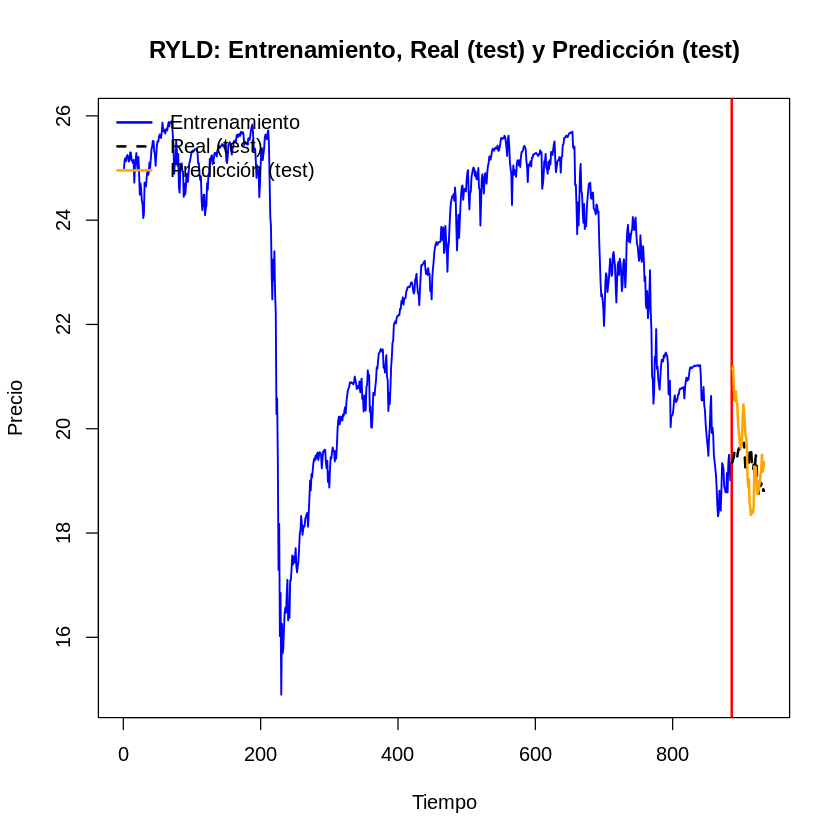

In [149]:
plot(1:train_size, train_df$RYLD, type = "l", col = "blue", lwd = 1.5,
     xlim = c(1, n), ylim = range(c(pr_df$RYLD, y_pred)),
     ylab = "Precio", xlab = "Tiempo", main = "RYLD: Entrenamiento, Real (test) y Predicción (test)")
abline(v = train_size, col = "red", lwd = 2)
lines((train_size+1):n, y_true, col = "black", lty = 2, lwd = 2)
lines((train_size+1):n, y_pred, col = "orange", lwd = 2)
legend("topleft", legend = c("Entrenamiento", "Real (test)", "Predicción (test)"),
       col = c("blue", "black", "orange"), lty = c(1,2,1), lwd = 2, bty = "n")